# Dynamic Models



### Preliminaries

- Goal 
  - Introduction to dynamic (=temporal) Latent Variable Models, including the Hidden Markov Model and Kalman filter.   
- Materials
  - Mandatory
    - These lecture notes
  - Optional 
    - Bishop pp.605-615 on Hidden Markov Models
    - Bishop pp.635-641 on Kalman filters
    - Faragher (2012), [Understanding the Basis of the Kalman Filter](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Faragher-2012-Understanding-the-Basis-of-the-Kalman-Filter.pdf)
    - Minka (1999), [From Hidden Markov Models to Linear Dynamical Systems](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Minka-1999-from-HMM-to-LDS.pdf)
      

### Example Problem

- We consider a one-dimensional cart position tracking problem, see [Faragher 2012](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Faragher-2012-Understanding-the-Basis-of-the-Kalman-Filter.pdf).  

- The hidden states are the position $z_t$ and velocity $\dot z_t$. We can apply an external acceleration/breaking force $u_t$. (Noisy) observations are represented by $x_t$. 

- The equations of motions are given by

$$\begin{align}
\begin{bmatrix} z_t \\ \dot{z_t}\end{bmatrix} &=  \begin{bmatrix} 1 & \Delta t \\ 0 & 1\end{bmatrix} \begin{bmatrix} z_{t-1} \\ \dot z_{t-1}\end{bmatrix} + \begin{bmatrix} (\Delta t)^2/2 \\ \Delta t\end{bmatrix} u_t + \mathcal{N}(0,\Sigma_z) \\
x_t &= \begin{bmatrix} z_t \\ \dot{z_t}\end{bmatrix} + \mathcal{N}(0,\Sigma_x) 
\end{align}$$

- Infer the position $z_t$ after 10 time steps. (Solution later in this lesson).

<img src="./figures/Faragher-2012-cart-1.png" width="600px">


### Dynamical Models

<!--- - In this lesson, we consider models where the sequence order of observations matters. 
--->

- Consider the _ordered_ observation sequence $x^T \triangleq \left(x_1,x_2,\ldots,x_T\right)$.
  - (For brevity, we use the notation $x_t^T$ to denote $(x_t,x_{t+1},\ldots,x_T)$ and drop the subscript if $t=1$).

- We wish to develop a generative model
    $$ p( x^T \,|\, \theta)$$
that 'explains' the time series $x^T$.

- We cannot use the IID assumption $p( x^T  | \theta) = \prod_t p(x_t \,|\, \theta)$. In general, we _can_ use the [**chain rule**](https://en.wikipedia.org/wiki/Chain_rule_(probability)) (a.k.a. the general product rule)

$$\begin{align*}
p(x^T) &= p(x_T|x^{T-1}) \,p(x^{T-1}) \\
  &=  p(x_T|x^{T-1}) \,p(x_{T-1}|x^{T-2}) \cdots p(x_2|x_1)\,p(x_1) \\
  &= p(x_1)\prod_{t=2}^T p(x_t\,|\,x^{t-1})
\end{align*}$$

- Generally, we will want to limit the depth of dependencies on previous observations. For example, the $M$th-order linear **Auto-Regressive** (AR) model
    $$\begin{align*}
  p(x_t\,|\,x^{t-1}) = \mathcal{N}\left(x_t \,\middle|\,  \sum_{m=1}^M a_m x_{t-m}\,,\sigma^2\,\right)  
    \end{align*}$$
    limits the dependencies to the past $M$ samples.

### State-space Models

- A limitation of AR models is that they need a lot of parameters in order to create a flexible model. E.g., if $x_t$ is an $K$-dimensional discrete variable, then an $M$th-order AR model will have about $K^{M}$ parameters. 

- Similar to our work on Gaussian Mixture models, we can create a flexible dynamic system by introducing _latent_ (unobserved) variables  $z^T \triangleq \left(z_1,z_2,\dots,z_T\right)$ (one $z_t$ for each observation $x_t$). In dynamic systems, $z_t$ are called _state variables_.

- A general **state space model** is defined by
$$\begin{align*}
 p(x^T,z^T) &= \underbrace{p(z_1)}_{\text{initial state}} \prod_{t=2}^T \underbrace{p(z_t\,|\,z^{t-1})}_{\text{state transitions}}\,\prod_{t=1}^T \underbrace{p(x_t\,|\,z_t)}_{\text{observations}}
\end{align*}$$


- A common assumption is to let state transitions be ruled by a _first-order Markov chain_ as

$$
 p(z_t\,|\,z^{t-1}) = p(z_t\,|\,z_{t-1})
$$

- In a Markovian state-space model, the observation sequence $x^T$ is not a first-order Markov chain, i.e., for the state-space model
    $$\begin{align*}
 p(x^T,z^T) &= p(z_1) \prod_{t=2}^T p(z_t\,|\,z_{t-1})\,\prod_{t=1}^T p(x_t\,|\,z_t)
\end{align*}$$
the following statement holds: 
    $$p(x_t\,|\,x_{t-1},x_{t-2}) \neq p(x_t\,|\,x_{t-1})\,.$$
In other words, the latent variables $z_t$ represent a memory bank for past observations beyond $t-1$. (Proof as exercise). 


- The Forney-style factor graph for a state-space model:

<img src="./figures/ffg-state-space.png" width="600px">

### Hidden Markov Models and Linear Dynamical Systems

- A **Hidden Markov Model** (HMM) is a specific state-space model with <span class="emphasis">discrete-valued</span> state variables $Z_t$.

- E.g., $Z_t$ is a $K$-dimensional hidden binary 'class indicator' with transition probabilities $A_{jk} \triangleq p(z_{tk}=1\,|\,z_{t-1,j}=1)$, or equivalently
  $$p(z_t|z_{t-1}) = \prod_{k=1}^K \prod_{j=1}^K A_{jk}^{z_{t-1,j}z_{tk}}$$
which is usually accompanied by an initial state distribution $\pi_k \triangleq p(z_{1k}=1)$.

  
- The classical HMM has also discrete-valued observations but in pratice any (probabilistic) observation model $p(x_t|z_t)$ may be coupled to the hidden Markov chain. 

<!---
- The following figure shows the typical trellis structure of the many possible state transitions paths.   
<img src="./figures/Figure13.7.png" width="400px">
--->

- Another well-known state-space model with <span class="emphasis">continuous-valued</span> state variables $Z_t$ is the **(Linear) Gaussian Dynamical System** (LGDS), which is defined as

$$\begin{align*}
p(z_t\,|\,z_{t-1}) &= \mathcal{N}\left(\, A z_{t-1}\,,\,\Sigma_z\,\right) \\ 
p(x_t\,|\,z_t) &= \mathcal{N}\left(\, C z_t\,,\,\Sigma_x\,\right) \\
p(z_1) &= \mathcal{N}\left(\, \mu_1\,,\,\Sigma_1\,\right)
\end{align*}$$
<!---or, equivalently (in the usual state-space notation)
$$\begin{align*}
z_k &= A z_{k-1} + \mathcal{N}\left(0,\Sigma_z \right) \\ 
x_k &= C z_k + \mathcal{N}\left( 0, \Sigma_x \right) \\
z_1 &= \mu_1 + \mathcal{N}\left( 0, \Sigma_1\right)
\end{align*}$$
--->

- Note that the joint distribution over $\{(x_1,z_1),\ldots,(x_t,z_t)\}$ is a (large-dimensional) Gaussian distribution. This means that, in principle, every inference problem on the LGDS model also leads to a Gaussian distribution.

- HMM's and LGDS's (and variants thereof) are at the basis of a wide range of complex information processing systems, such as speech and language recognition, robotics and automatic car navigation, and even processing of DNA sequences.  

### Kalman Filtering

- Technically, a [**Kalman filter**](https://en.wikipedia.org/wiki/Kalman_filter) is the solution to the recursive estimation (inference) of the hidden state $z_t$ based on past observations in an LGDS, i.e., Kalman filtering solves the problem $p(z_t\,|\,x^t)$ based on the previous estimate $p(z_{t-1}\,|\,x^{t-1})$ and a new observation $x_t$ (in the context of the given model specification of course). 
 

 
- Let's infer the Kalman filter for a scalar linear Gaussian dynamical system:
$$\begin{align*}
    p(z_t\,|\,z_{t-1}) &= \mathcal{N}(z_t\,|\,a z_{t-1},\sigma_z^2) \tag{state transition}   \\
    p(x_t\,|\,z_t) &= \mathcal{N}(x_t\,|\,c z_t,\sigma_x^2) \tag{observation}     
\end{align*}$$

        
- Kalman filtering comprises inferring $p(z_t\,|\,x^t)$ from a given prior estimate $p(z_{t-1}\,|\,x^{t-1})$ and a new observation $x_t$. Let us assume that 
$$\begin{align} 
p(z_{t-1}\,|\,x^{t-1}) = \mathcal{N}(z_{t-1} \,|\, \mu_{t-1}, \sigma_{t-1}^2) \tag{prior}
\end{align}$$ 

- Note that everything is Gaussian, so this is _in principle_ possible to execute inference problems analytically and the result will be a Gaussian posterior:

$$\begin{align*}
\underbrace{p(z_t\,|\,x^t)}_{\text{posterior}} &= p(z_t\,|\,x_t,x^{t-1}) \propto p(x_t,z_t\,|\,x^{t-1}) \\
  &\propto p(x_t\,|\,z_t) \,p(z_t\,|\,x^{t-1}) \\
  &= p(x_t\,|\,z_t) \, \sum_{z_{t-1}} p(z_t,z_{t-1}\,|\,x^{t-1}) \\
  &= \underbrace{p(x_t\,|\,z_t)}_{\text{observation}} \, \sum_{z_{t-1}} \underbrace{p(z_t\,|\,z_{t-1})}_{\text{state transition}} \, \underbrace{p(z_{t-1}\,|\,x^{t-1})}_{\text{prior}} \\
    &= \mathcal{N}(x_t\,|\,c z_t,\sigma_x^2) \sum_{z_{t-1}} \mathcal{N}(z_t\,|\,a z_{t-1},\sigma_z^2) \, \mathcal{N}(z_{t-1} \,|\, \mu_{t-1}, \sigma_{t-1}^2) \\
  &= c\,\mathcal{N}\left(z_t\bigm| \frac{x_t}{c} ,\left(\frac{\sigma_x}{c}\right)^2\right)  \sum_{z_{t-1}} a\,\underbrace{\mathcal{N}\left(z_{t-1}\bigm|  \frac{z_t}{a},\left(\frac{\sigma_z}{a}\right)^2 \right) \, \mathcal{N}(z_{t-1} \,|\, \mu_{t-1}, \sigma_{t-1}^2)}_{\text{use Gaussian multiplication formula SRG-6}} \\
  &\propto \underbrace{\mathcal{N}\left(z_t\,\bigm| \,\frac{x_t}{c} ,\left(\frac{\sigma_x}{c}\right)^2\right) \cdot \mathcal{N}\left(z_t\, \bigm|\,a \mu_{t-1},\sigma_z^2 + \left(a \sigma_{t-1}\right)^2 \right)}_{\text{use SRG-6 again}} \\
  &\propto \mathcal{N}\left( z_t \,|\, \mu_t, \sigma_t^2\right)
\end{align*}$$
with
$$\begin{align*}
  \rho_t^2 &= a^2 \sigma_{t-1}^2 + \sigma_z^2 \tag{predicted variance}\\
  K_t &= \frac{c \rho_t^2}{c^2 \rho_t^2 + \sigma_x^2} \tag{Kalman gain} \\
  \mu_t &= \underbrace{a \mu_{t-1}}_{\text{prior prediction}} + K_t \cdot \underbrace{\left( x_t - c a \mu_{t-1}\right)}_{\text{prediction error}} \tag{posterior mean}\\
  \sigma_t^2 &= \left( 1 - c\cdot K_t \right) \rho_t^2 \tag{posterior variance}
\end{align*}$$

- Kalman filtering consists of computing/updating these last four equations for each new observation ($x_t$). 

### Multi-dimensional Kalman Filtering

- The Kalman filter equations can also be derived for multidimensional state-space models. In particular, for the model
$$\begin{align*}
z_t &= A z_{t-1} + \mathcal{N}(0,\Gamma) \\
x_t &= C z_t + \mathcal{N}(0,\Sigma)
\end{align*}$$
the Kalman filter update equations for the posterior $p(z_t |x^t) = \mathcal{N}\left(z_t \bigm| \mu_t, V_t \right)$ are given by (see Bishop, pg.639)
$$\begin{align*}
P_t &= A V_{t-1} A^T + \Gamma \tag{predicted variance}\\
K_t &= P_t C^T \cdot \left(C P_t C^T  + \Sigma \right)^{-1} \tag{Kalman gain} \\
\mu_t &= A \mu_{t-1} + K_t\cdot\left(x_t - C A \mu_{t-1} \right) \tag{posterior state mean}\\
V_t &= \left(I-K_t C \right) P_{t}  \tag{posterior state variance}
\end{align*}$$



### Kalman Filtering and the Cart Position Tracking Example Revisited

#### CODE EXAMPLE

- We can now solve the cart tracking problem of the introductory example by implementing the Kalman filter.

In [1]:
using Pkg;Pkg.activate("probprog/workspace/");Pkg.instantiate()
IJulia.clear_output();

Prediction: 𝒩(m=[39.52, 4.18], v=[[1.30, 0.39][0.39, 0.34]])

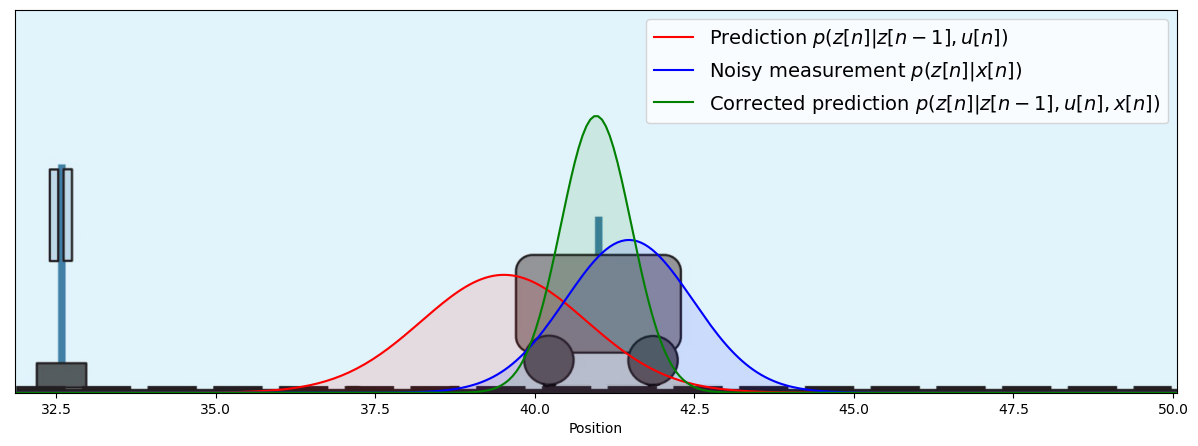



Measurement: 𝒩(m=[41.48, 9.01], v=[[1.00, 0.00][0.00, 2.00]])

Posterior: 𝒩(m=[40.96, 5.06], v=[[0.55, 0.15][0.15, 0.24]])



In [2]:
using LinearAlgebra, PyPlot
include("scripts/cart_tracking_helpers.jl")

# Specify the model parameters
Δt = 1.0                     # assume the time steps to be equal in size
A = [1.0 Δt;
     0.0 1.0]
b = [0.5*Δt^2; Δt] 
Σz = convert(Matrix,Diagonal([0.2*Δt; 0.1*Δt])) # process noise covariance
Σx = convert(Matrix,Diagonal([1.0; 2.0]))     # observation noise covariance;

# Generate noisy observations
n = 10                # perform 10 timesteps
z_start = [10.0; 2.0] # initial state
u = 0.2 * ones(n)     # constant input u
noisy_x = generateNoisyMeasurements(z_start, u, A, b, Σz, Σx);

m_z = noisy_x[1]                                    # initial predictive mean
V_z = A * (1e8*Diagonal(I,2) * A') + Σz             # initial predictive covariance

for t = 2:n
    global m_z, V_z, m_pred_z, V_pred_z
    #predict
    m_pred_z = A * m_z + b * u[t]                   # predictive mean
    V_pred_z = A * V_z * A' + Σz                    # predictive covariance
    #update
    gain = V_pred_z * inv(V_pred_z + Σx)            # Kalman gain
    m_z = m_pred_z + gain * (noisy_x[t] - m_pred_z) # posterior mean update
    V_z = (Diagonal(I,2)-gain)*V_pred_z             # posterior covariance update
end
println("Prediction: ",ProbabilityDistribution(Multivariate,GaussianMeanVariance,m=m_pred_z,v=V_pred_z))
println("Measurement: ", ProbabilityDistribution(Multivariate,GaussianMeanVariance,m=noisy_x[n],v=Σx))
println("Posterior: ", ProbabilityDistribution(Multivariate,GaussianMeanVariance,m=m_z,v=V_z))
plotCartPrediction2(m_pred_z[1], V_pred_z[1], m_z[1], V_z[1], noisy_x[n][1], Σx[1][1]);

### Recap Dynamical Models 

- Dynamical systems do not obey the sample-by-sample independence assumption, but still can be specified, and state and parameter estimation equations can be solved by similar tools as for static models.

- Two of the more famous and powerful models with latent states include the hidden Markov model (with discrete states) and the Linear Gaussian dynamical system (with continuous states).

- For the LGDS, the Kalman filter is a well-known recursive state estimation procedure. The Kalman filter can be derived through Bayesian update rules on Gaussian distributions. 

- If anything changes in the model, e.g., the state noise is not Gaussian, then you have to re-derive the inference equations again from scratch and it may not lead to an analytically pleasing answer. 

- $\Rightarrow$ Generally, we will want to automate the inference processes. This topic is the domain of Probabilistic Programming, whih we will discuss later in this course. 

## <center> OPTIONAL SLIDES</center>

### Extensions of Generative Gaussian Models

- Using the methods of the previous lessons, it is possible to create your own new models based on stacking Gaussian and categorical distributions in new ways: 

<img src="./figures/fig-generative-Gaussian-models.png" width="600px">

### Message Passing in State-space Models


- As we have seen, inference tasks in linear Gaussian state space models can be analytically solved, see e.g. [Faragher, 2012](https://github.com/bertdv/BMLIP/blob/master/lessons/notebooks/files/Faragher-2012-Understanding-the-Basis-of-the-Kalman-Filter.pdf) and the Kalman filter derivation above.

- However, these derivations quickly become cumbersome and prone to errors.

- Alternatively, we could specify the generative model in a (Forney-style) factor graph and use automated message passing to infer the posterior over the hidden variables. E.g., the message passing schedule for Kalman filtering looks like this: 

<img src="./figures/ffg-state-space-with-state-estimation.png" width="600">



### The Cart Tracking Problem Revisited: Inference by Message Passing

- Let's solve the cart tracking problem by sum-product message passing in a factor graph like the one depicted above. All we have to do is create factor nodes for the state-transition model $p(z_t|z_{t-1})$ and the observation model $p(x_t|z_t)$. Then we just build the factor graph and let [ForneyLab](http://forneylab.org) execute the message passing schedule. 

#### CODE EXAMPLE

- We'll implement the following model using ForneyLab:

$$\begin{align*}
\begin{bmatrix} z_t \\ \dot{z_t}\end{bmatrix} &=  \begin{bmatrix} 1 & \Delta t \\ 0 & 1\end{bmatrix} \begin{bmatrix} z_{t-1} \\ \dot z_{t-1}\end{bmatrix} + \begin{bmatrix} (\Delta t)^2/2 \\ \Delta t\end{bmatrix} u_t + \mathcal{N}(0,\Sigma_z) \\
\mathbf{x}_t &= \begin{bmatrix} z_t \\ \dot{z_t}\end{bmatrix} + \mathcal{N}(0,\Sigma_x)
\end{align*}$$


Since the factor graph is just a concatination of $n$ identical "sections" (one for each time step), we only have to specify a single section. When running the message passing algorithm we will explictly use the posterior of the previous timestep as prior in the next one. Let's build a section of the factor graph:

In [3]:
fg = FactorGraph()
z_prev_m = Variable(id=:z_prev_m); placeholder(z_prev_m, :z_prev_m, dims=(2,))
z_prev_v = Variable(id=:z_prev_v); placeholder(z_prev_v, :z_prev_v, dims=(2,2))
bu = Variable(id=:bu); placeholder(bu, :bu, dims=(2,))

@RV z_prev ~ GaussianMeanVariance(z_prev_m, z_prev_v, id=:z_prev) # p(z_prev)
@RV noise_z ~ GaussianMeanVariance(constant(zeros(2), id=:noise_z_m), constant(Σz, id=:noise_z_v)) # process noise
@RV z = constant(A, id=:A) * z_prev + bu + noise_z; z.id = :z # p(z|z_prev) (state transition model)
@RV x ~ GaussianMeanVariance(z, constant(Σx, id=:Σx)) # p(x|z) (observation model)
placeholder(x, :x, dims=(2,));
ForneyLab.draw(fg)

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
 "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<!-- Generated by graphviz version 2.40.1 (20161225.0304)
 -->
<!-- Title: G Pages: 1 -->
 
 
 G 
 
<!-- 11569292143152822039 -->
 
 11569292143152822039 
 
 noise_z_v 
 
<!-- 17911493632571396310 -->
 
 17911493632571396310 
 
 × 
 multiplication_1 
 
<!-- 9532012032666834751 -->
 
 9532012032666834751 
 
 𝒩 
 z_prev 
 
<!-- 17911493632571396310--9532012032666834751 -->
 
 17911493632571396310--9532012032666834751 
 
 z_prev 
 1 out 
 2 in1 
 
<!-- 9210452408235483628 -->
 
 9210452408235483628 
 
 A 
 
<!-- 17911493632571396310--9210452408235483628 -->
 
 17911493632571396310--9210452408235483628 
 
 A 
 1 out 
 3 a 
 
<!-- 11545110317617062651 -->
 
 11545110317617062651 
 
 placeholder_x 
 
<!-- 8834368466284355322 -->
 
 8834368466284355322 
 
 𝒩 
 gaussianmeanvariance_2 
 
<!-- 11545110317617062651--8834368466284355322 -->
 
 11545110317617062651--8834368466284355322 
 
 x 
 1 out 
 1 out 
 
<!-- 9156830119485632152 -->
 
 9156830119485632152 
 
 placeholder_z_prev_m 
 
<!-- 9532012032666834751--9156830119485632152 -->
 
 9532012032666834751--9156830119485632152 
 
 z_prev_m 
 1 out 
 2 m 
 
<!-- 5502977411163723889 -->
 
 5502977411163723889 
 
 placeholder_z_prev_v 
 
<!-- 9532012032666834751--5502977411163723889 -->
 
 9532012032666834751--5502977411163723889 
 
 z_prev_v 
 1 out 
 3 v 
 
<!-- 8248179304545353332 -->
 
 8248179304545353332 
 
 noise_z_m 
 
<!-- 7002694100869071845 -->
 
 7002694100869071845 
 
 placeholder_bu 
 
<!-- 18065764863557619982 -->
 
 18065764863557619982 
 
 + 
 addition_2 
 
<!-- 8834368466284355322--18065764863557619982 -->
 
 8834368466284355322--18065764863557619982 
 
 z 
 1 out 
 2 m 
 
<!-- 1089790268540942652 -->
 
 1089790268540942652 
 
 Σx 
 
<!-- 8834368466284355322--1089790268540942652 -->
 
 8834368466284355322--1089790268540942652 
 
 Σx 
 1 out 
 3 v 
 
<!-- 6433507866617313021 -->
 
 6433507866617313021 
 
 𝒩 
 gaussianmeanvariance_1 
 
<!-- 18065764863557619982--6433507866617313021 -->
 
 18065764863557619982--6433507866617313021 
 
 noise_z 
 1 out 
 3 in2 
 
<!-- 1774440954316240006 -->
 
 1774440954316240006 
 
 + 
 addition_1 
 
<!-- 18065764863557619982--1774440954316240006 -->
 
 18065764863557619982--1774440954316240006 
 
 variable_2 
 1 out 
 2 in1 
 
<!-- 6433507866617313021--11569292143152822039 -->
 
 6433507866617313021--11569292143152822039 
 
 noise_z_v 
 1 out 
 3 v 
 
<!-- 6433507866617313021--8248179304545353332 -->
 
 6433507866617313021--8248179304545353332 
 
 noise_z_m 
 1 out 
 2 m 
 
<!-- 1774440954316240006--17911493632571396310 -->
 
 1774440954316240006--17911493632571396310 
 
 variable_1 
 1 out 
 2 in1 
 
<!-- 1774440954316240006--7002694100869071845 -->
 
 1774440954316240006--7002694100869071845 
 
 bu 
 1 out 
 3 in2

Now that we've built the factor graph, we can perform Kalman filtering by inserting measurement data into the factor graph and performing message passing.

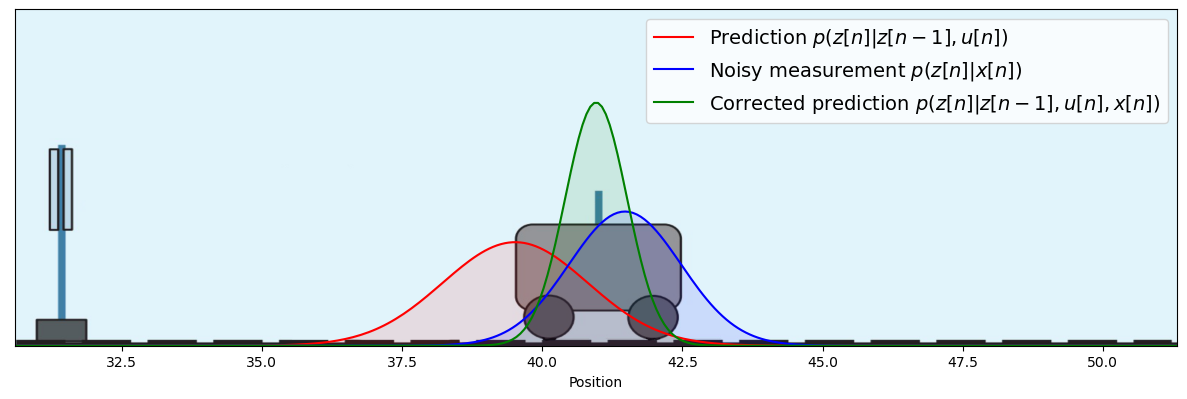

Prediction: 𝒩(m=[39.52, 4.18], v=[[1.30, 0.39][0.39, 0.34]])

Measurement: 𝒩(m=[41.48, 9.01], v=[[1.00, 0.00][0.00, 2.00]])

Posterior: 𝒩(m=[40.96, 5.06], v=[[0.55, 0.15][0.15, 0.24]])



In [4]:
include("scripts/cart_tracking_helpers.jl")
algo = sumProductAlgorithm(z)
source_code = algorithmSourceCode(algo)
eval(Meta.parse(source_code))
marginals = Dict()
messages = Array{Message}(undef,6)
z_prev_m_0 = noisy_x[1]  
z_prev_v_0 = A * (1e8*Diagonal(I,2) * A') + Σz 
for t=2:n
    data = Dict(:x => noisy_x[t], :bu => b*u[t],:z_prev_m => z_prev_m_0, :z_prev_v => z_prev_v_0)
    step!(data, marginals, messages) # perform msg passing (single timestep)
    # Posterior of z becomes prior of z in the next timestep:
    z_prev_m_0 = ForneyLab.unsafeMean(marginals[:z])
    z_prev_v_0 = ForneyLab.unsafeCov(marginals[:z])
end
# Collect prediction p(z[n]|z[n-1]), measurement p(z[n]|x[n]), corrected prediction p(z[n]|z[n-1],x[n])
prediction      = messages[5].dist # the message index is found by manual inspection of the schedule
measurement     = messages[6].dist
corr_prediction = convert(ProbabilityDistribution{Multivariate, GaussianMeanVariance}, marginals[:z])
println("Prediction: ",prediction)
println("Measurement: ",measurement)
println("Posterior: ", corr_prediction)

# Make a fancy plot of the prediction, noisy measurement, and corrected prediction after n timesteps
plotCartPrediction(prediction, measurement, corr_prediction);



- Note that both the analytical Kalman filtering solution and the message passing solution lead to the same results. The advantage of message passing-based inference with ForneyLab is that we did not need to derive any inference equations. ForneyLab took care of all that. 

- ForneyLab is an example of a **probabilistic programming language** (PPL). More about PPLs later in the PP minicourse.

In [5]:
open("../../styles/aipstyle.html") do f display("text/html", read(f, String)) end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->